<a href="https://colab.research.google.com/github/Khushi-0/LGMVIP-DataScience/blob/main/Marks_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**TASK - 1 PREDICTION USING SUPERVISED ML**
To predict the percentage of a student based on the number of study hours.

## Author - Khushi Koladiya

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## **Loading the Data**

In [2]:
# Reading the Data 
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

There is no null value in dataset so we can now visuallize our data.

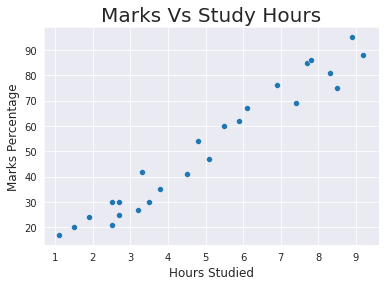

In [4]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

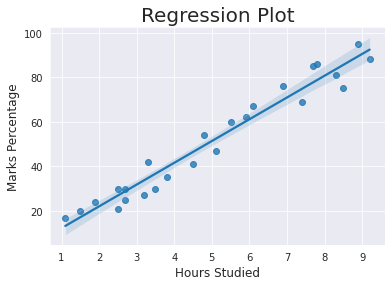

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.

## **Training the Model**
### 1) Splitting the Data

In [6]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 1)


### 2) Fitting the Data into the model

In [8]:
regression = LinearRegression()
regression.fit(X_train, y_train)
print("Model Trained.")

Model Trained.


## **Predicting the Percentage of Marks**

In [9]:
y_predict = regression.predict(X_val)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_val], 'Predicted Marks': [k for k in y_predict]})
prediction

,Hours,Predicted Marks
0,1.1,10.151901
1,3.3,32.739761
2,1.9,18.365669
3,8.5,86.129249
4,4.8,48.140575
5,7.7,77.915481
6,6.1,61.487947


## **Comparing the Predicted Marks with the Actual Marks**

In [10]:
compare_scores = pd.DataFrame({'Actual Marks': y_val, 'Predicted Marks': y_predict})
compare_scores

,Actual Marks,Predicted Marks
0,17,10.151901
1,42,32.739761
2,24,18.365669
3,75,86.129249
4,54,48.140575
5,85,77.915481
6,67,61.487947


## **Visually Comparing the Predicted Marks with the Actual Marks**

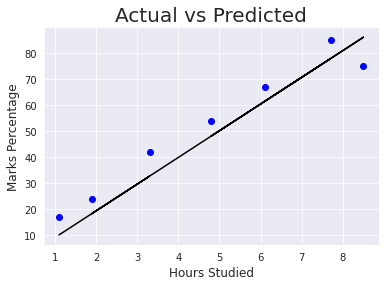

In [11]:
plt.scatter(x=X_val, y=y_val, color='blue')
plt.plot(X_val, y_predict, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## **Evaluating the Model**

In [12]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_val,y_predict))

Mean absolute error:  7.3325591780007


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

## **What will be the predicted score of a student if he/she studies for 8.15 hrs/ day?**

In [13]:
hours = [8.15]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 82.536


According to the regression model if a student studies for 8.15 hours a day he/she is likely to score 82.536 marks.

## **Summary**

In this project, we learned to train our own supervised machine learning model using Predict the percentage of a student based on the number of study hours Project with Machine Learning. Through this project, we learned about machine learning, data analysis, data visualization, model creation, etc.